<h1 style="color:#444; font-size:2.5em;">Skill Connect: Week 1 - Advanced Challenge</h1>

# 2. kMeans Clustering

In [1]:
from sklearn.datasets import load_iris as load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style(style="darkgrid")

## Obtaining the dataset

In [2]:
dataset = load_dataset()
X = dataset["data"]
X_features = dataset['feature_names']
y = dataset["target"]

print(f"features:\t{X_features}")
print(f"data shape:\t{X.shape}")

df = pd.DataFrame(data=X,columns=X_features)
df.head()

features:	['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data shape:	(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualizing Data

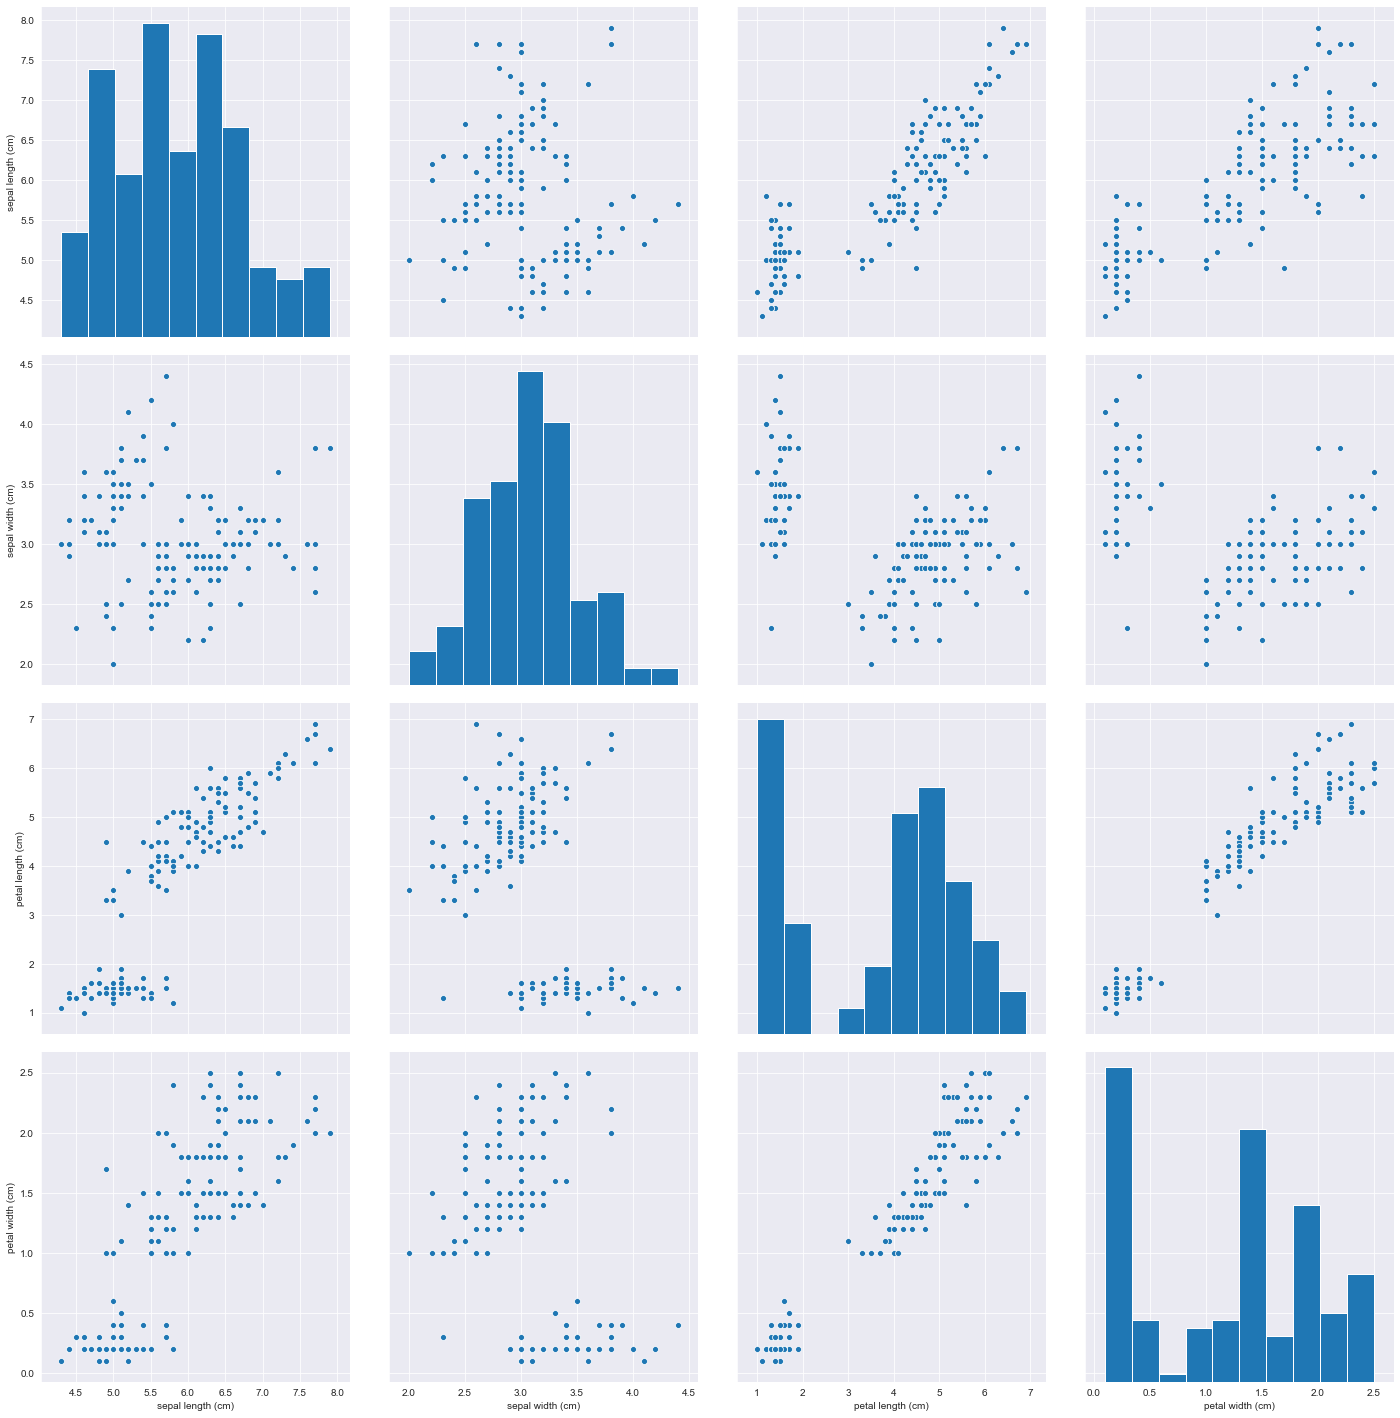

In [3]:
grid = sns.pairplot(data=df)
grid.fig.set_size_inches(20,20)

## Self Written

In [4]:
def init(d):
    mi = d.min()
    ma = d.max()
    return (np.random.rand() * (ma - mi)) + mi

# Performs clustering on the given x and y data and returns k centroids.
def get_centroids(x, y, k:"number of clusters"=2, stop_it:"min stopping distance"=1e-10)->"array of cluster co-ordinates":

    centroids = []
    for i in range(k):
        centroids.append(np.array([init(x),init(y)]))
    co_ordins = np.array([x,y]).T
    centroids_path = []
    centroids = np.array(centroids)
    prev_centroids = centroids.copy()
    
    while True:
        dists = []
        for centroid in centroids:
            dists.append(((co_ordins - centroid)**2).sum(axis=1)**.5)
            
        closest_centroid = np.array(dists).argmin(axis=0)
        for i in range(k):
            mask = closest_centroid == i
            centroids[i] = co_ordins[mask].mean(axis=0)
        
        if ((prev_centroids - centroids)**2).mean() < stop_it:
            break
        else:
            centroids_path.append(centroids.copy())
            prev_centroids = centroids.copy()
            
    return centroids, np.array(centroids_path).transpose(1,2,0)

### Functions written to help in visualizing clustering.

In [5]:
def plot_centroid_path(paths):
    k=paths.shape[0]
    l=paths.shape[2] - 1
    for i in range(k):
        plt.plot(paths[i][0],paths[i][1],alpha=0.3,c='0')
    for i in range(k):
        plt.scatter(paths[i][0][l],paths[i][1][l],s=50,c='0',marker='^')
        
def get_classes(x,y,centroids):
    co = np.array([x,y]).T
    centroids
    dists = []
    for centroid in centroids:
        dists.append(((co - centroid)**2).sum(axis=1)**0.5)
    return np.array(dists).argmin(axis=0)

def plot_classes(x,y,classes):
    df = pd.DataFrame(data=np.array([x,y]).T,columns=['x','y'])
    df['class'] = classes
    sns.scatterplot(data=df,x='x',y='y',hue='class',palette="Set1",)
    

def call_everything(df, x_name=X_features[0],y_name=X_features[1],k=3):
    x = df[x_name]
    y = df[y_name]
    print(f"Performing clustering\nx:{x_name} y:{y_name}")
    centroids, paths = get_centroids(x,y,k)
    classes = get_classes(x,y,centroids)
    plot_classes(x,y,classes)
    plot_centroid_path(paths)


Triangles indicate the centroid, and the path connecting it shows the path taken from random initialization to final point.
Here, just using two of the four features so that visualization is possible in 2D

Performing clustering
x:sepal length (cm) y:sepal width (cm)


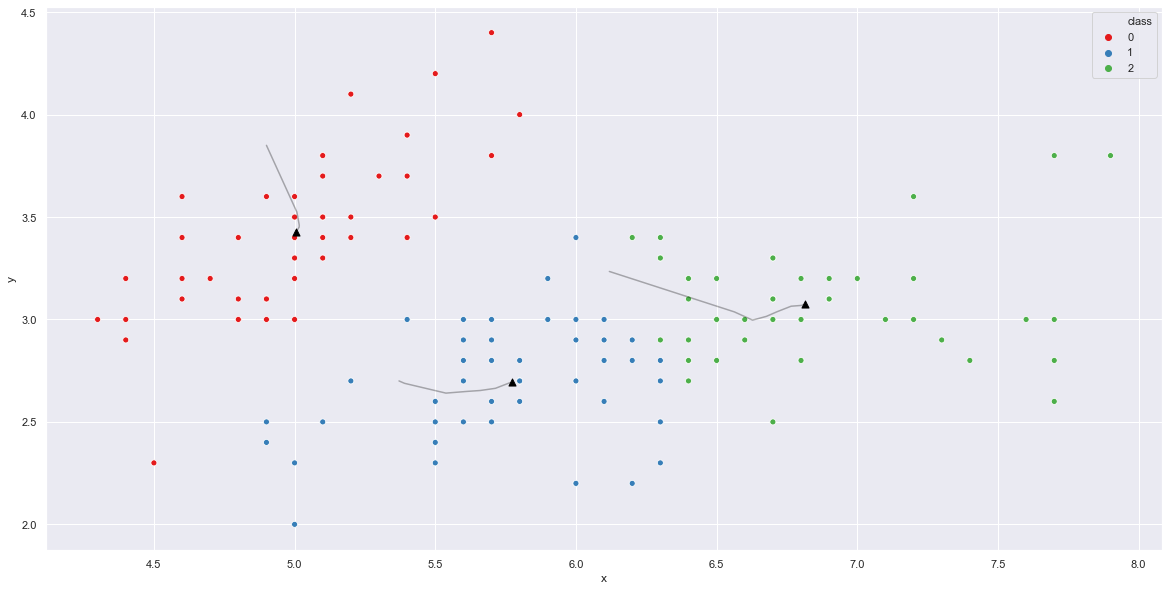

In [6]:
sns.set(rc={'figure.figsize':(20,10)})
call_everything(df)

## Using sklearn

In [7]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [8]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size=0.8, stratify=y, shuffle=True)
cl = KMeans(n_clusters=3)
cl.fit(X_tr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# Code below switches class labels to align with cluster classes
def swap_val(arr,v1,v2):
    arr = arr.copy()
    z_mask = (arr == v1)
    o_mask = (arr == v2)
    arr[z_mask] = v2
    arr[o_mask] = v1
    return arr

In [27]:
# Need to check before swapping. 
# If acc very low then incorrect swap.
y_te_fx = swap_val(y_te,2,1) 
te_score = (cl.predict(X_te) == y_te_fx).sum()/y_te_fx.shape[0]
print(f"Accuracy (test)  {te_score*100:0.3f} %")

y_tr_fx = swap_val(y_tr,2,1)
tr_score = (cl.predict(X_tr) == y_tr_fx).sum()/y_tr_fx.shape[0]
print(f"Accuracy (train) {tr_score*100:0.3f} %")

Accuracy (test)  93.333 %
Accuracy (train) 88.333 %
